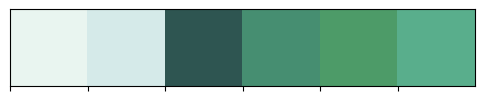

In [1]:
# Data
import pandas as pd
import numpy as np

# Pandas Profiling
#from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# Validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

#color pallet and theme
import matplotlib.colors

colors = ["#e9f5f0","#d5eae9","#2e5551",'#468e71','#4d9b68','#59ae8c']
colors2 = ["#2e5551",'#468e71','#4d9b68','#59ae8c', "#e9f5f0","#d5eae9"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

In [2]:
#!pip install ydata-profiling

In [3]:
#from ydata_profiling import ProfileReport

In [4]:
data = pd.read_csv('/kaggle/input/car-price-prediction-train/train.csv')

In [5]:
Df=pd.DataFrame(data)

In [6]:
Df.head(10)

id    brand                 model  model_year  milage fuel_type  \
0   0     Ford          F-150 Lariat        2018   74349  Gasoline   
1   1      BMW                 335 i        2007   80000  Gasoline   
2   2   Jaguar             XF Luxury        2009   91491  Gasoline   
3   3      BMW          X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac         Firebird Base        2001  111000  Gasoline   
5   5    Acura            Integra LS        2003  124756  Gasoline   
6   6     Audi      S5 3.0T Prestige        2014  107380  Gasoline   
7   7      GMC          Acadia SLT-1        2019   51300  Gasoline   
8   8     Audi  A3 2.0T Tech Premium        2016   87842  Gasoline   
9   9    Acura        MDX Technology        2007  152270  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
5       140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
6      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
7       193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel   
8       200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
9      300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                    10-Speed A/T    Blue    Gray   
1                     6-Speed M/T   Black   Black   
2                     6-Speed A/T  Purple   Beige   
3  Transmission w/Dual Shift Mode    Gray   Brown   
4                             A/T   White   Black   
5                     5-Speed M/T     Red   Beige   
6                     7-Speed A/T    Gray   Black   
7                     6-Speed A/T   White   Black   
8                     7-Speed A/T  Silver   Black   
9                     5-Speed A/T    Gray   Beige   

                                 accident clean_title  price  
0                           None reported         Yes  11000  
1                           None reported         Yes   8250  
2                           None reported         Yes  15000  
3                           None reported         Yes  63500  
4                           None reported         Yes   7850  
5  At least 1 accident or damage reported         Yes   4995  
6                           None reported         Yes  26500  
7  At least 1 accident or damage reported         Yes  25500  
8                           None reported         Yes  13999  
9  At least 1 accident or damage reported         Yes   6700

In [7]:
rows, col = Df.shape
print ("Dimensions of dataset: {}" . format (Df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (54273, 13)
Rows: 54273 
Columns: 13


In [8]:
Df.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                          .style.background_gradient(cmap="Greens")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')

In [9]:
unique = Df.nunique()
unique.to_frame().T

id  brand  model  model_year  milage  fuel_type  engine  transmission  \
0  54273     53   1827          34    3212          7    1061            46   

   ext_col  int_col  accident  clean_title  price  
0      260      124         2            1   1481

In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [11]:
#Converting accident values to 0 and 1.
Df['accident'] = Df['accident'].replace({'None reported': 0, 'At least 1 accident or damage reported': 1})
print(Df)

          id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                               

In [12]:
#Dropping inteiror and exterior colors
Df = Df.drop(columns=['clean_title','ext_col','int_col'])
print(Df)

          id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                               

In [13]:
Df['milage'].describe()

count     54273.000000
mean      72746.175667
std       50469.490448
min         100.000000
25%       32268.000000
50%       66107.000000
75%      102000.000000
max      405000.000000
Name: milage, dtype: float64

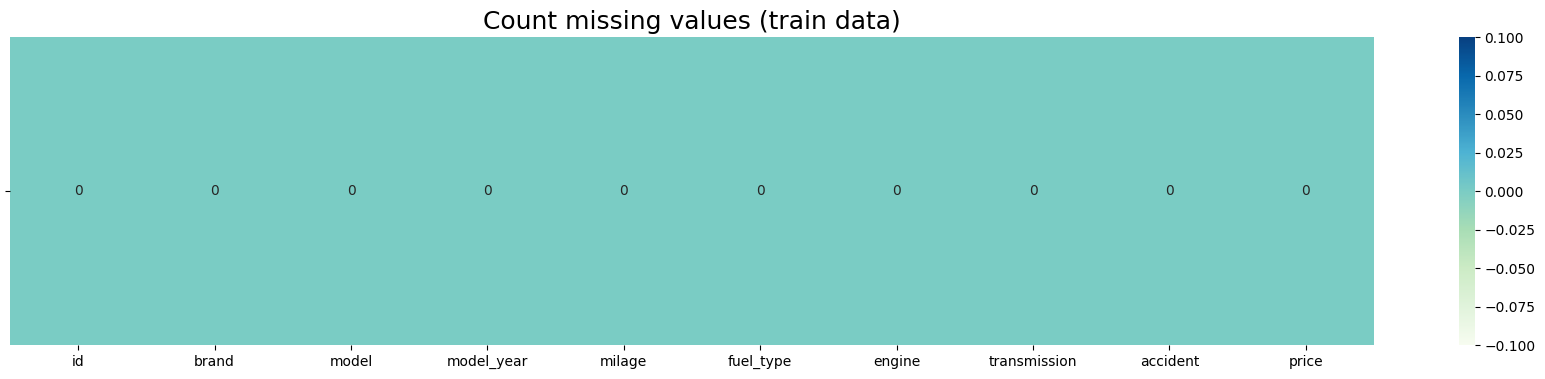

In [14]:
plt.figure(figsize=(22,4))
sns.heatmap((Df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (train data)', fontsize=18)
plt.show()

In [15]:
Df.duplicated().sum()

0

In [16]:
num_cols = pd.DataFrame (Df, columns= ['model_year', 'milage', 'accident','id','price'])
cat_cols = pd.DataFrame (Df, columns= ['brand', 'model', 'fuel_type', 'engine', 'transmission'])

In [17]:
# Separate numerical and categorical features into different lists
numerical_columns = list(Df.loc[:,['model_year', 'milage', 'accident','id','price']])
categorical_columns = list(Df.loc[:,['transmission', 'engine', 'fuel_type', 'model', 'brand']])

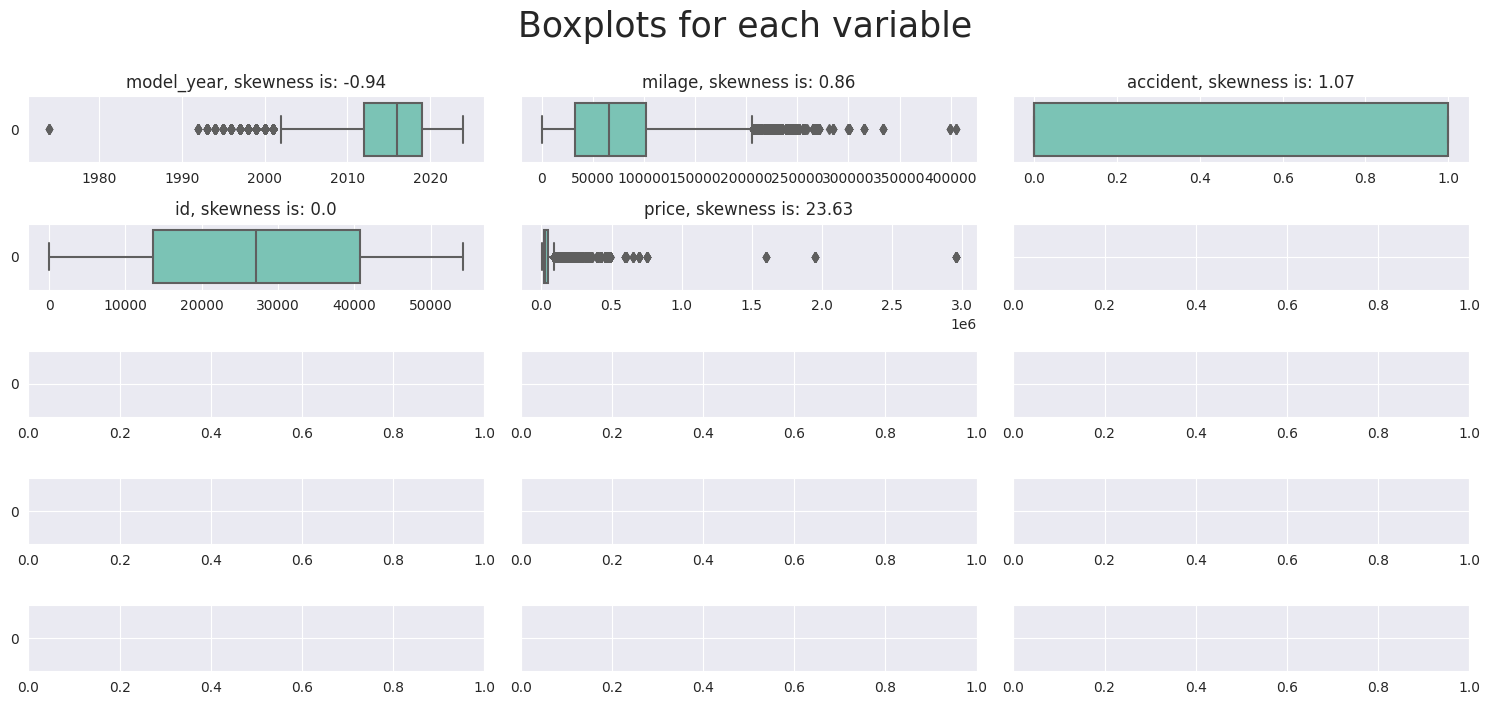

In [18]:
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=Df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [19]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

model_year  milage  accident  id  price
0        1211     729         0   0   3097

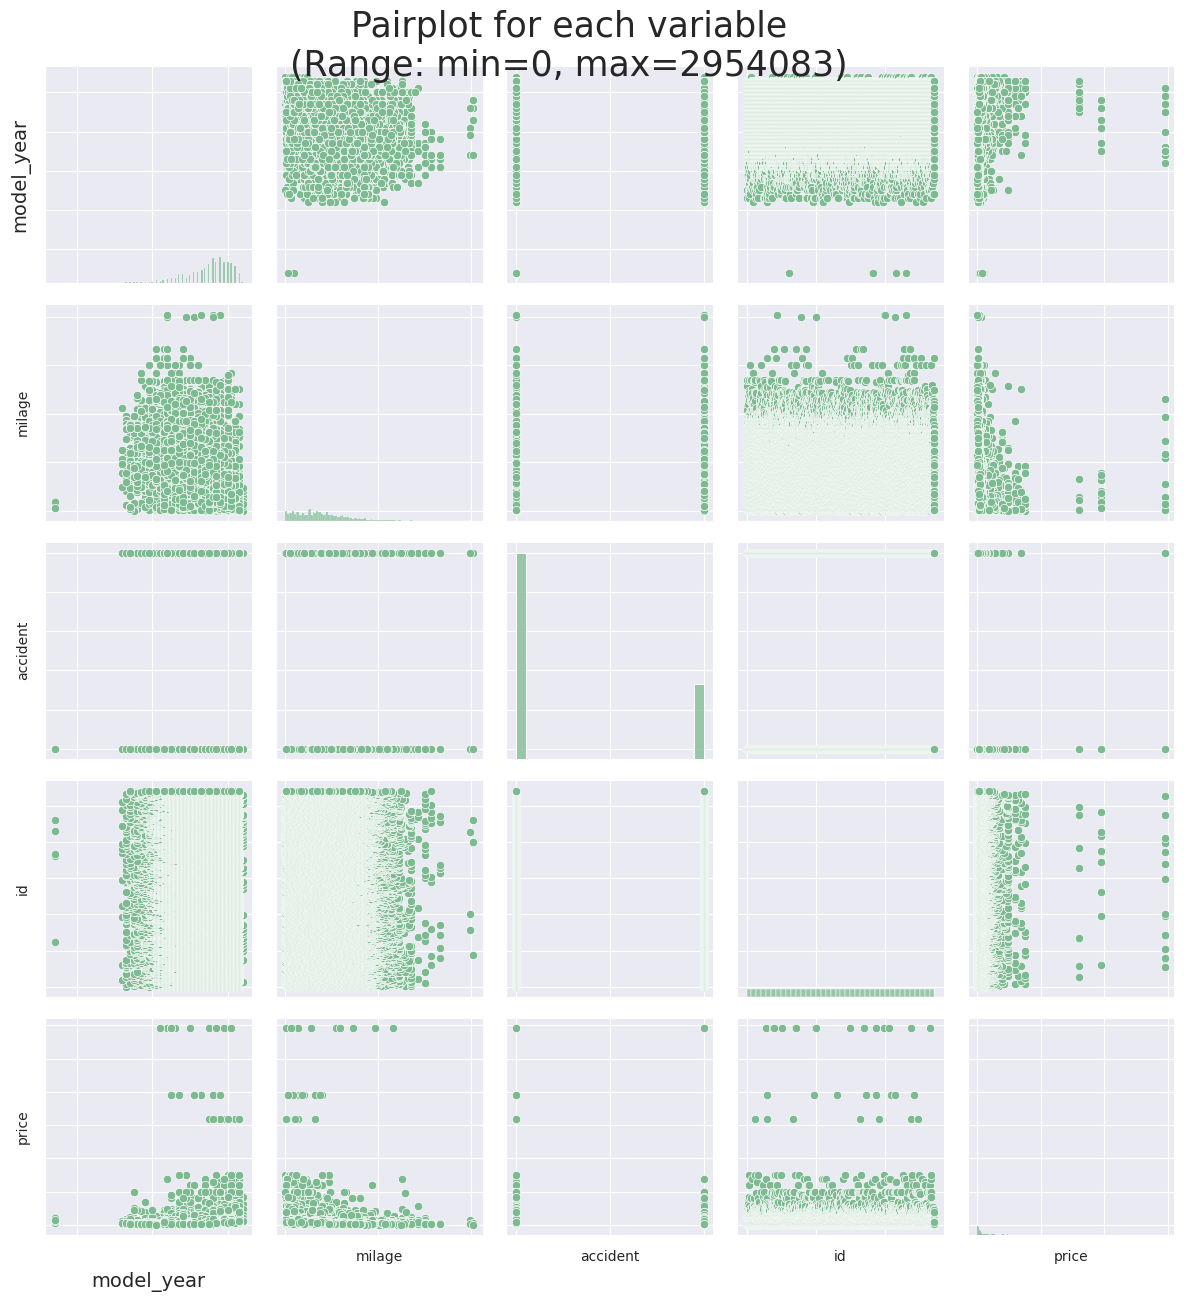

In [20]:
# Check noises by pairplot
sns.set_palette('crest')
sns.set_style('darkgrid')
dnp = sns.pairplot(Df.loc[:, numerical_columns])

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].xaxis.labelpad = 20
dnp.axes[-1][-1].yaxis.labelpad = 20

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(Df[numerical_columns].min().min(), Df[numerical_columns].max().max()), y=1.03, fontsize=25)

# Show the plot
plt.show()

Total number of features except for the target: 9
Number of categorical (<25 Unique Values) features: 2
Number of continuous features: 7


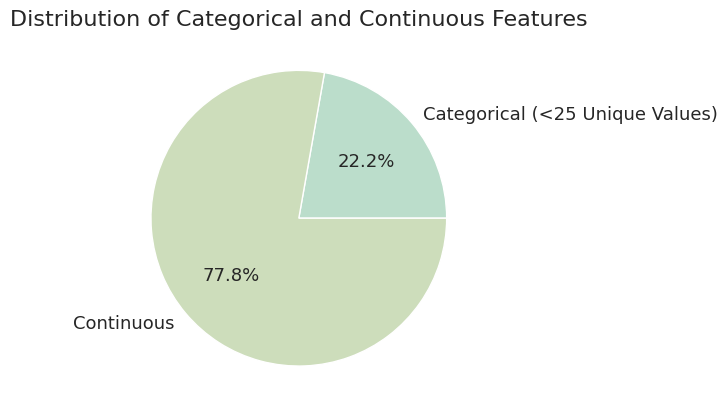

In [21]:
TARGET = 'price'
FEATURES = [col for col in Df.columns if col not in ['Df', TARGET]]

cat_features = [col for col in FEATURES if Df[col].nunique() < 25]
cont_features = [col for col in FEATURES if Df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(FEATURES)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#bbddcb', '#cdddbb']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

Total number of features except for the target: 10
Number of categorical (<25 Unique Values) features: 2
Categorical features: ['fuel_type', 'accident']
Number of continuous features: 8
Continuous features: ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'price']


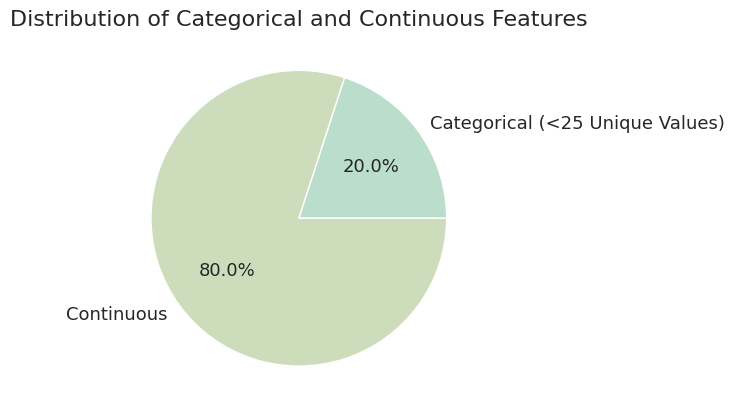

In [22]:
# Define the target and features
TARGET = 'price_range'
FEATURES = [col for col in Df.columns if col not in ['Df', TARGET]]

# Identify categorical and continuous features
cat_features = [col for col in FEATURES if Df[col].nunique() < 25]
cont_features = [col for col in FEATURES if Df[col].nunique() >= 25]

# Count the number of categorical and continuous features
num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

# Print the total number of features
print(f"Total number of features except for the target: {len(FEATURES)}")

# Print the number of categorical features and their names
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print("Categorical features:", cat_features)

# Print the number of continuous features and their names
print(f"\033[96mNumber of continuous features: {num_cont_features}")
print("Continuous features:", cont_features)

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#bbddcb', '#cdddbb']

# Create the pie chart
plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()


In [23]:
Df['price'].unique

<bound method Series.unique of 0         11000
1          8250
2         15000
3         63500
4          7850
          ...  
54268     29000
54269      6500
54270     18950
54271    194965
54272     37499
Name: price, Length: 54273, dtype: int64>

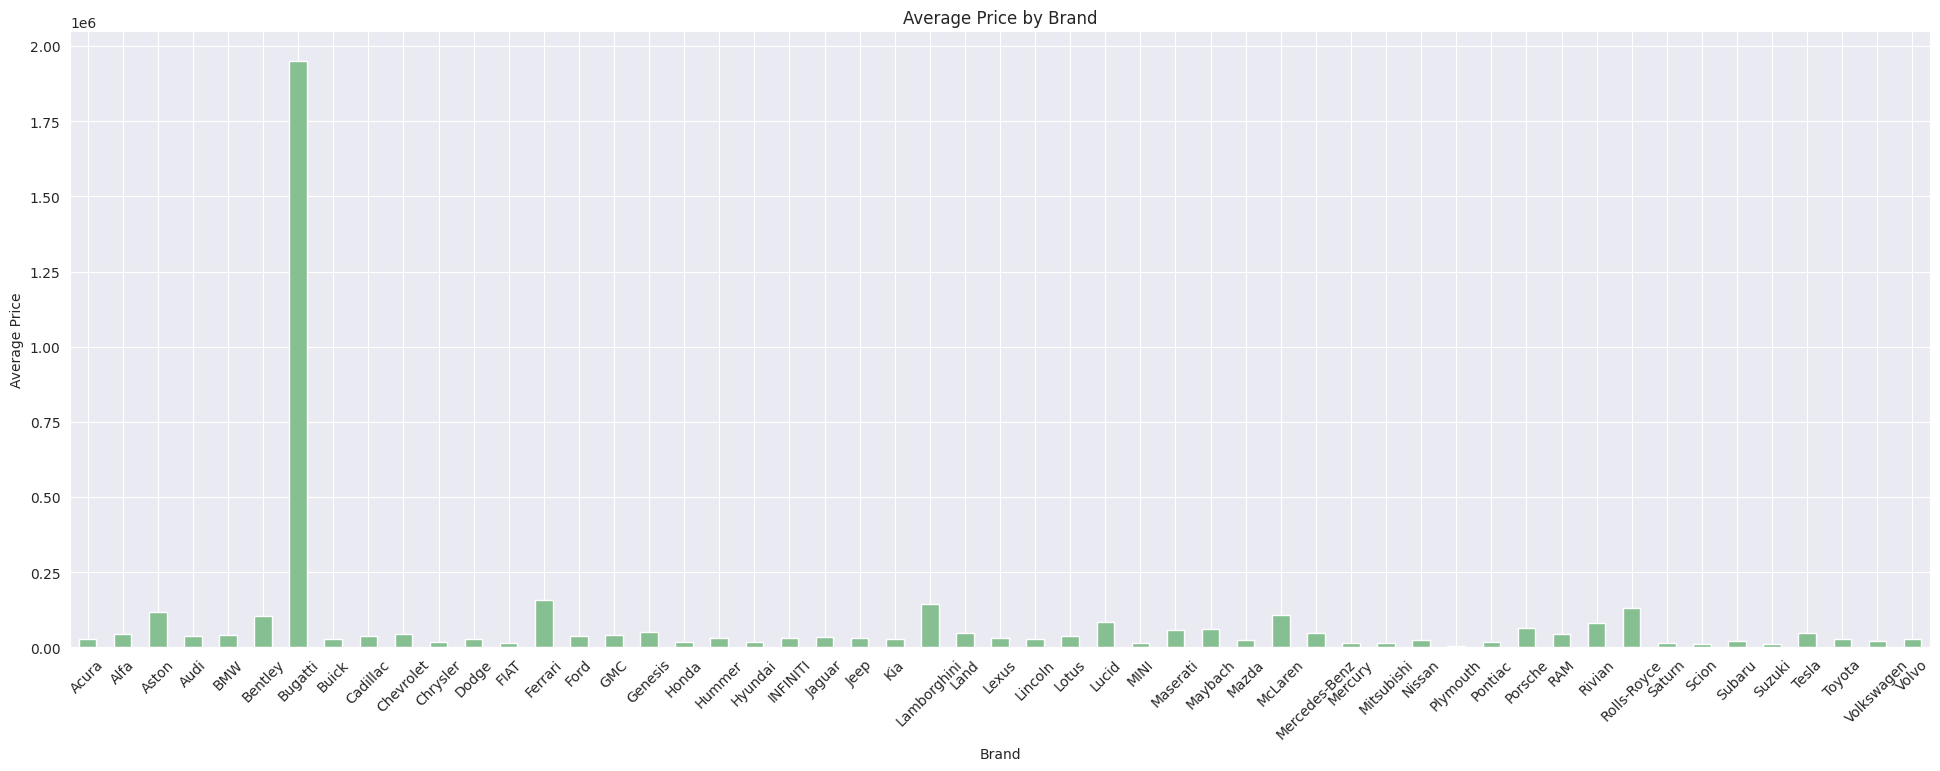

In [24]:
plt.figure(figsize=(24, 8)) 
avg_price_by_brand = Df.groupby('brand')['price'].mean()
avg_price_by_brand.plot(kind='bar', color='#86bf91')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Describing the categorical variables
cat_cols.describe().style.background_gradient(cmap='Greens')

In [26]:
min_price = Df['price'].min()
max_price = Df['price'].max()
avg_price = Df['price'].mean()
median_price = Df['price'].median()
print(f"The minimum price is: {min_price}")
print(f"The maximum price is: {max_price}")
print(f"The average price is: {avg_price}")
print(f"The median price is: {median_price}")

The minimum price is: 2000
The maximum price is: 2954083
The average price is: 39218.443332780575
The median price is: 28000.0


In [27]:
Df['price_rescaled'] = pd.cut(Df['price'], bins=4, labels=[0, 1, 2, 3])
print(Df)

          id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                               

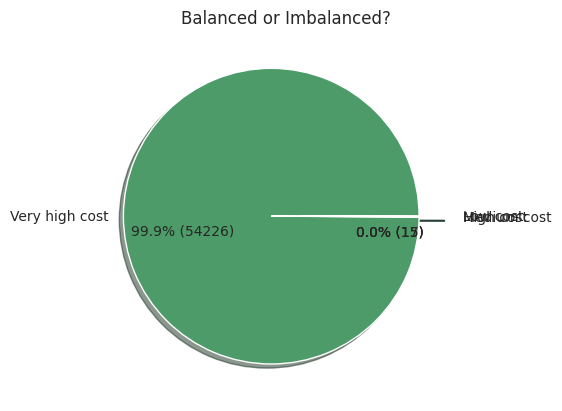

In [28]:
# Count the number of occurrences of each value in the 'price_range' column
value_counts = Df['price_rescaled'].value_counts()

# Define the label strings using f-strings
label = [f'{"Very high" if i==0 else "High" if i==1 else "Medium" if i==2 else "Low"} cost' for i in range(len(value_counts))]

# Define the colors for each pie slice
colors = ['#4d9b68', '#538e8a', '#468e71', '#59ae8c']

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label, colors=colors)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

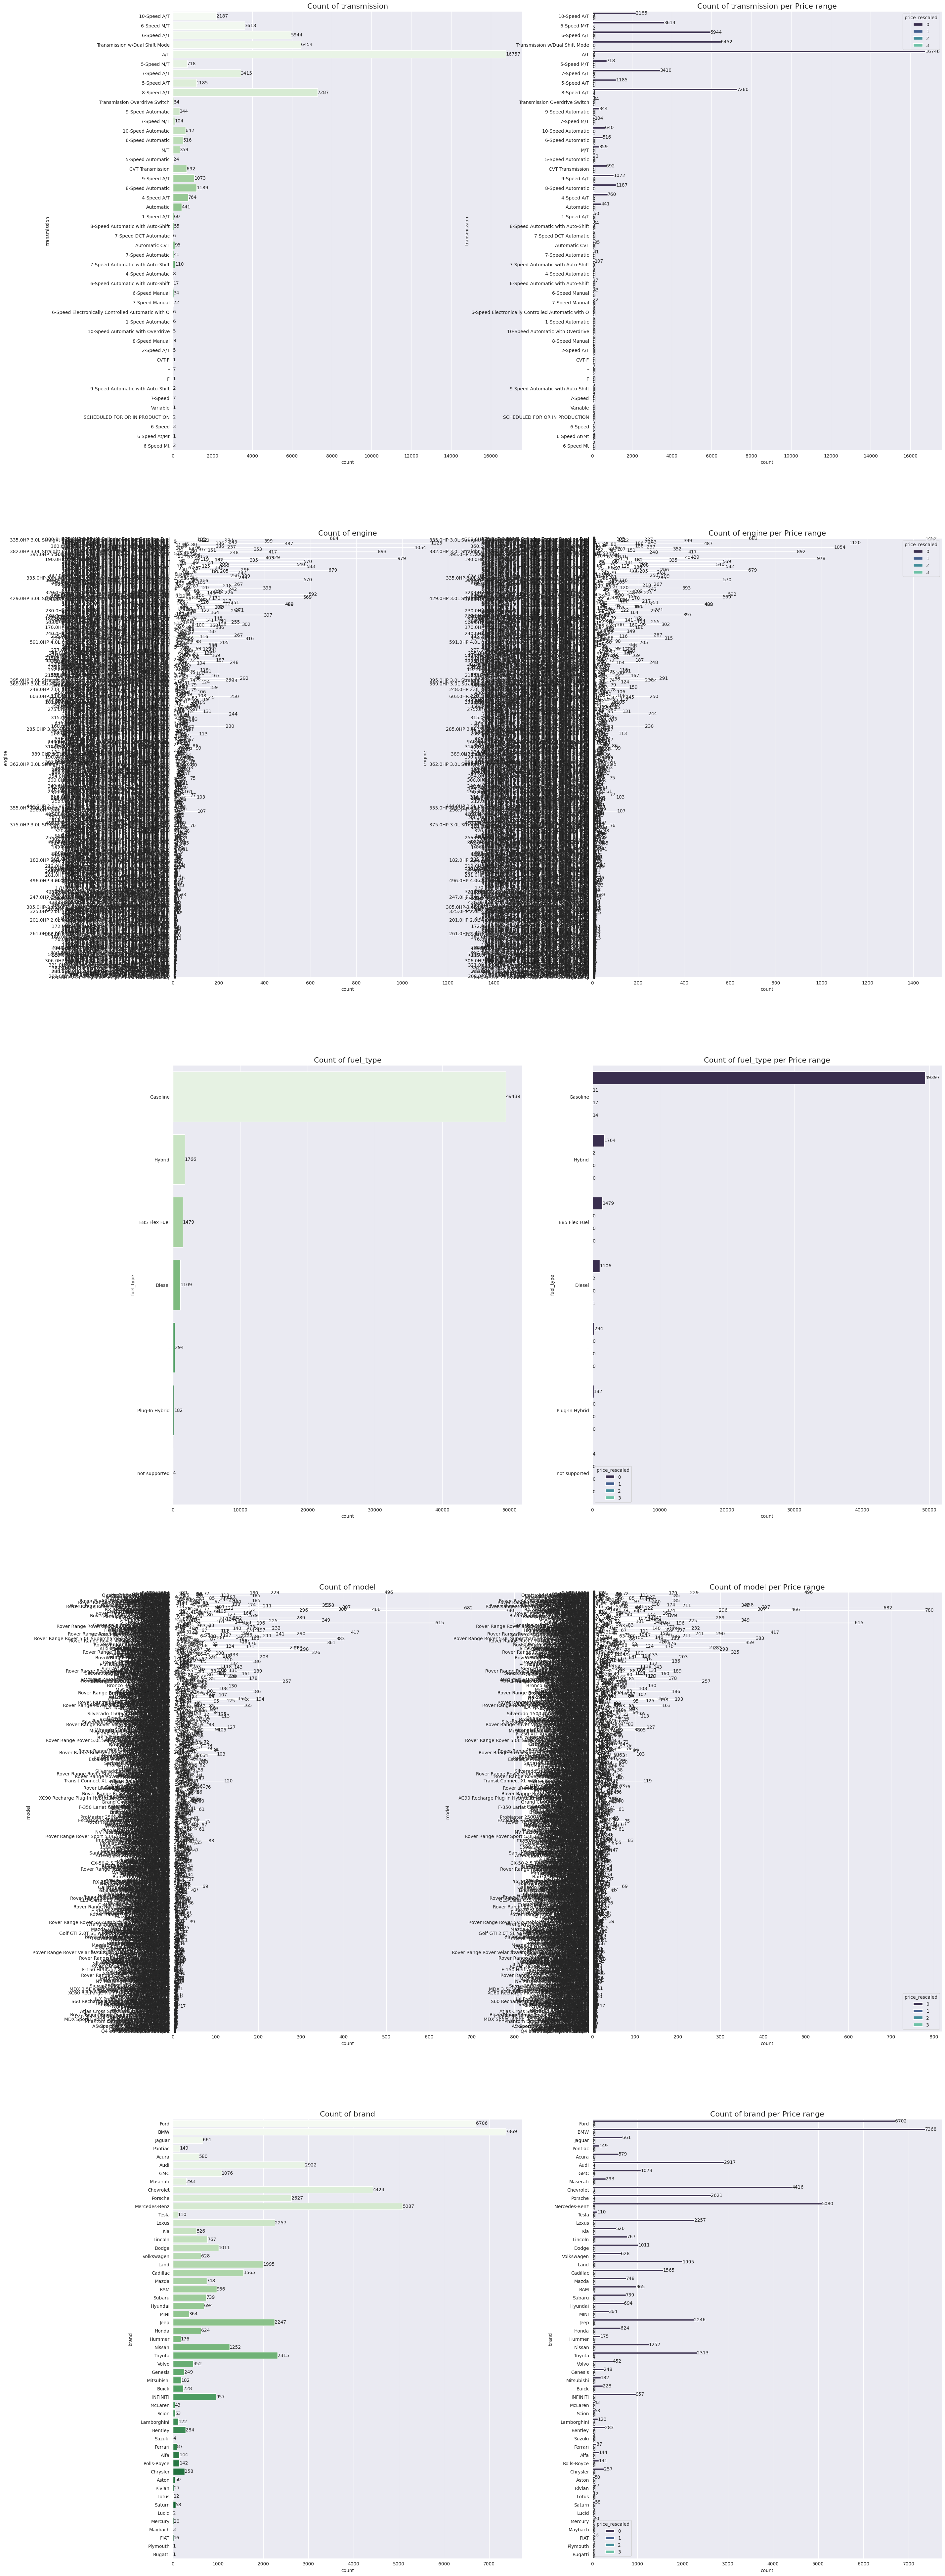

In [52]:
fig, axes = plt.subplots(5,2, figsize=(30,100))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=Df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=Df, y=col, palette='mako', orient='h',  hue='price_rescaled',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Price range', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

In [30]:
# Describing the categorical variables
cat_cols.describe().style.background_gradient(cmap='Greens')

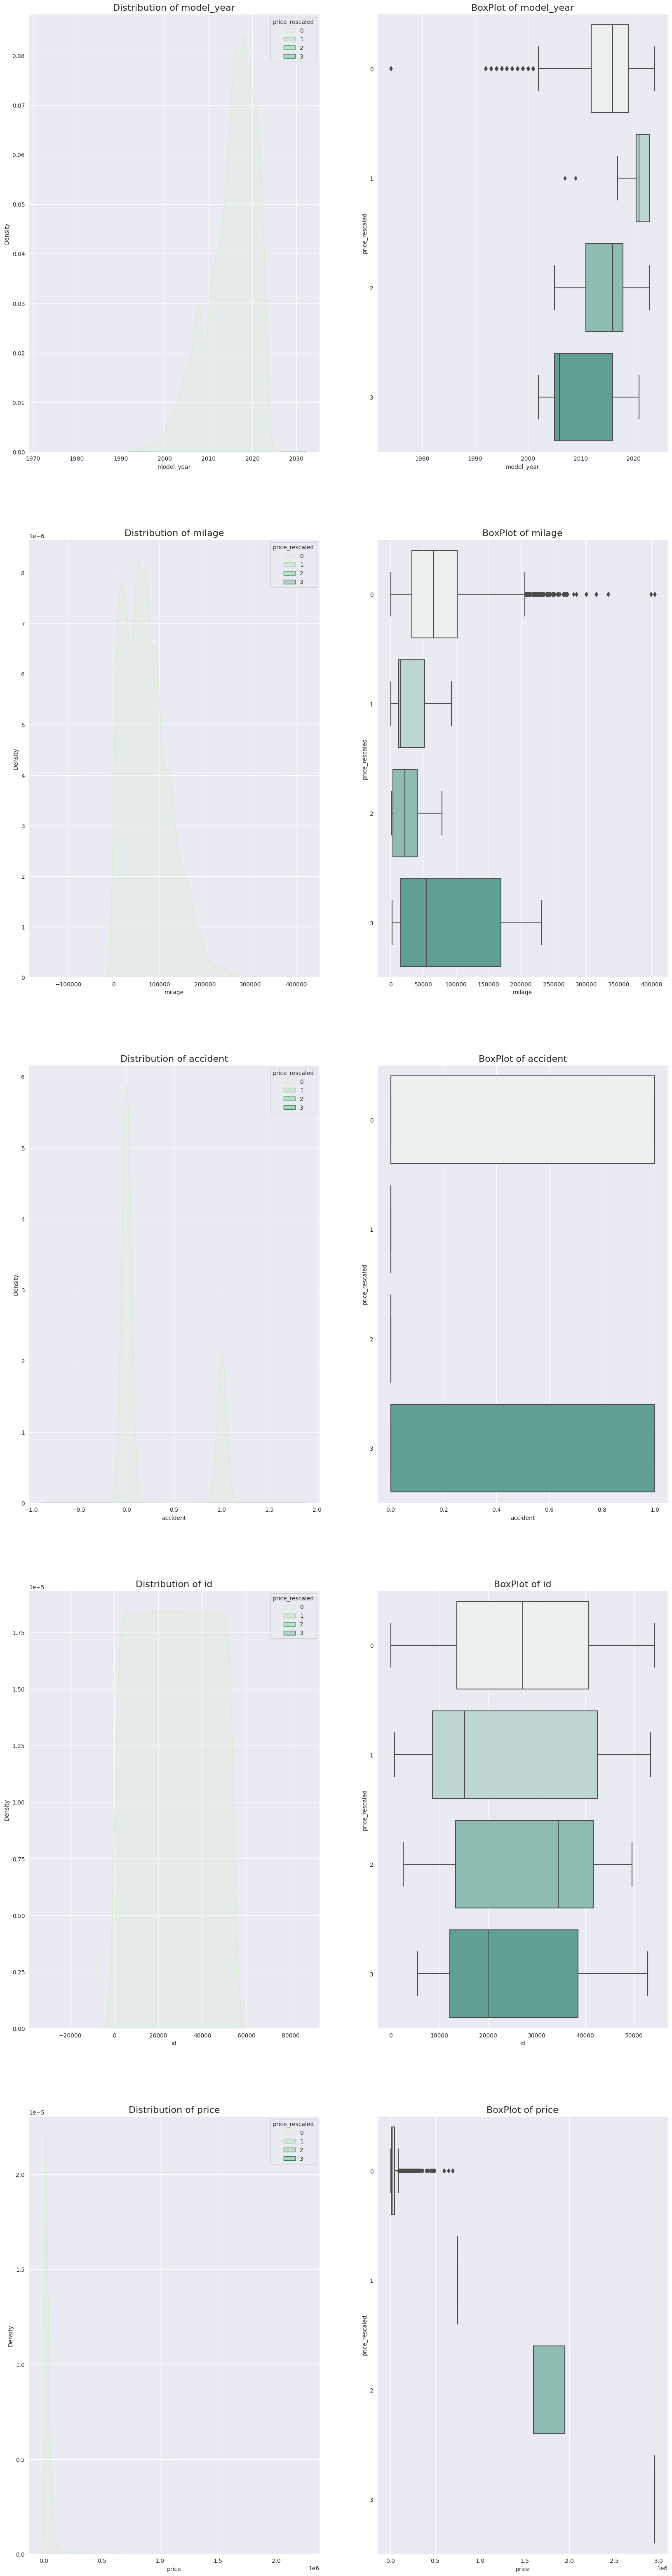

In [53]:
fig, axes = plt.subplots(5,2, figsize=(20,80))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=Df, x=col, palette='Greens',fill=True , hue='price_rescaled', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=Df, x=col, palette='light:#5A9' , y='price_rescaled', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

In [32]:
pr = Df.groupby(['price_rescaled'])
target = pr.describe(percentiles = [0.25, 0.5, 0.75])[numerical_columns]
target.style.background_gradient(cmap='Greens')

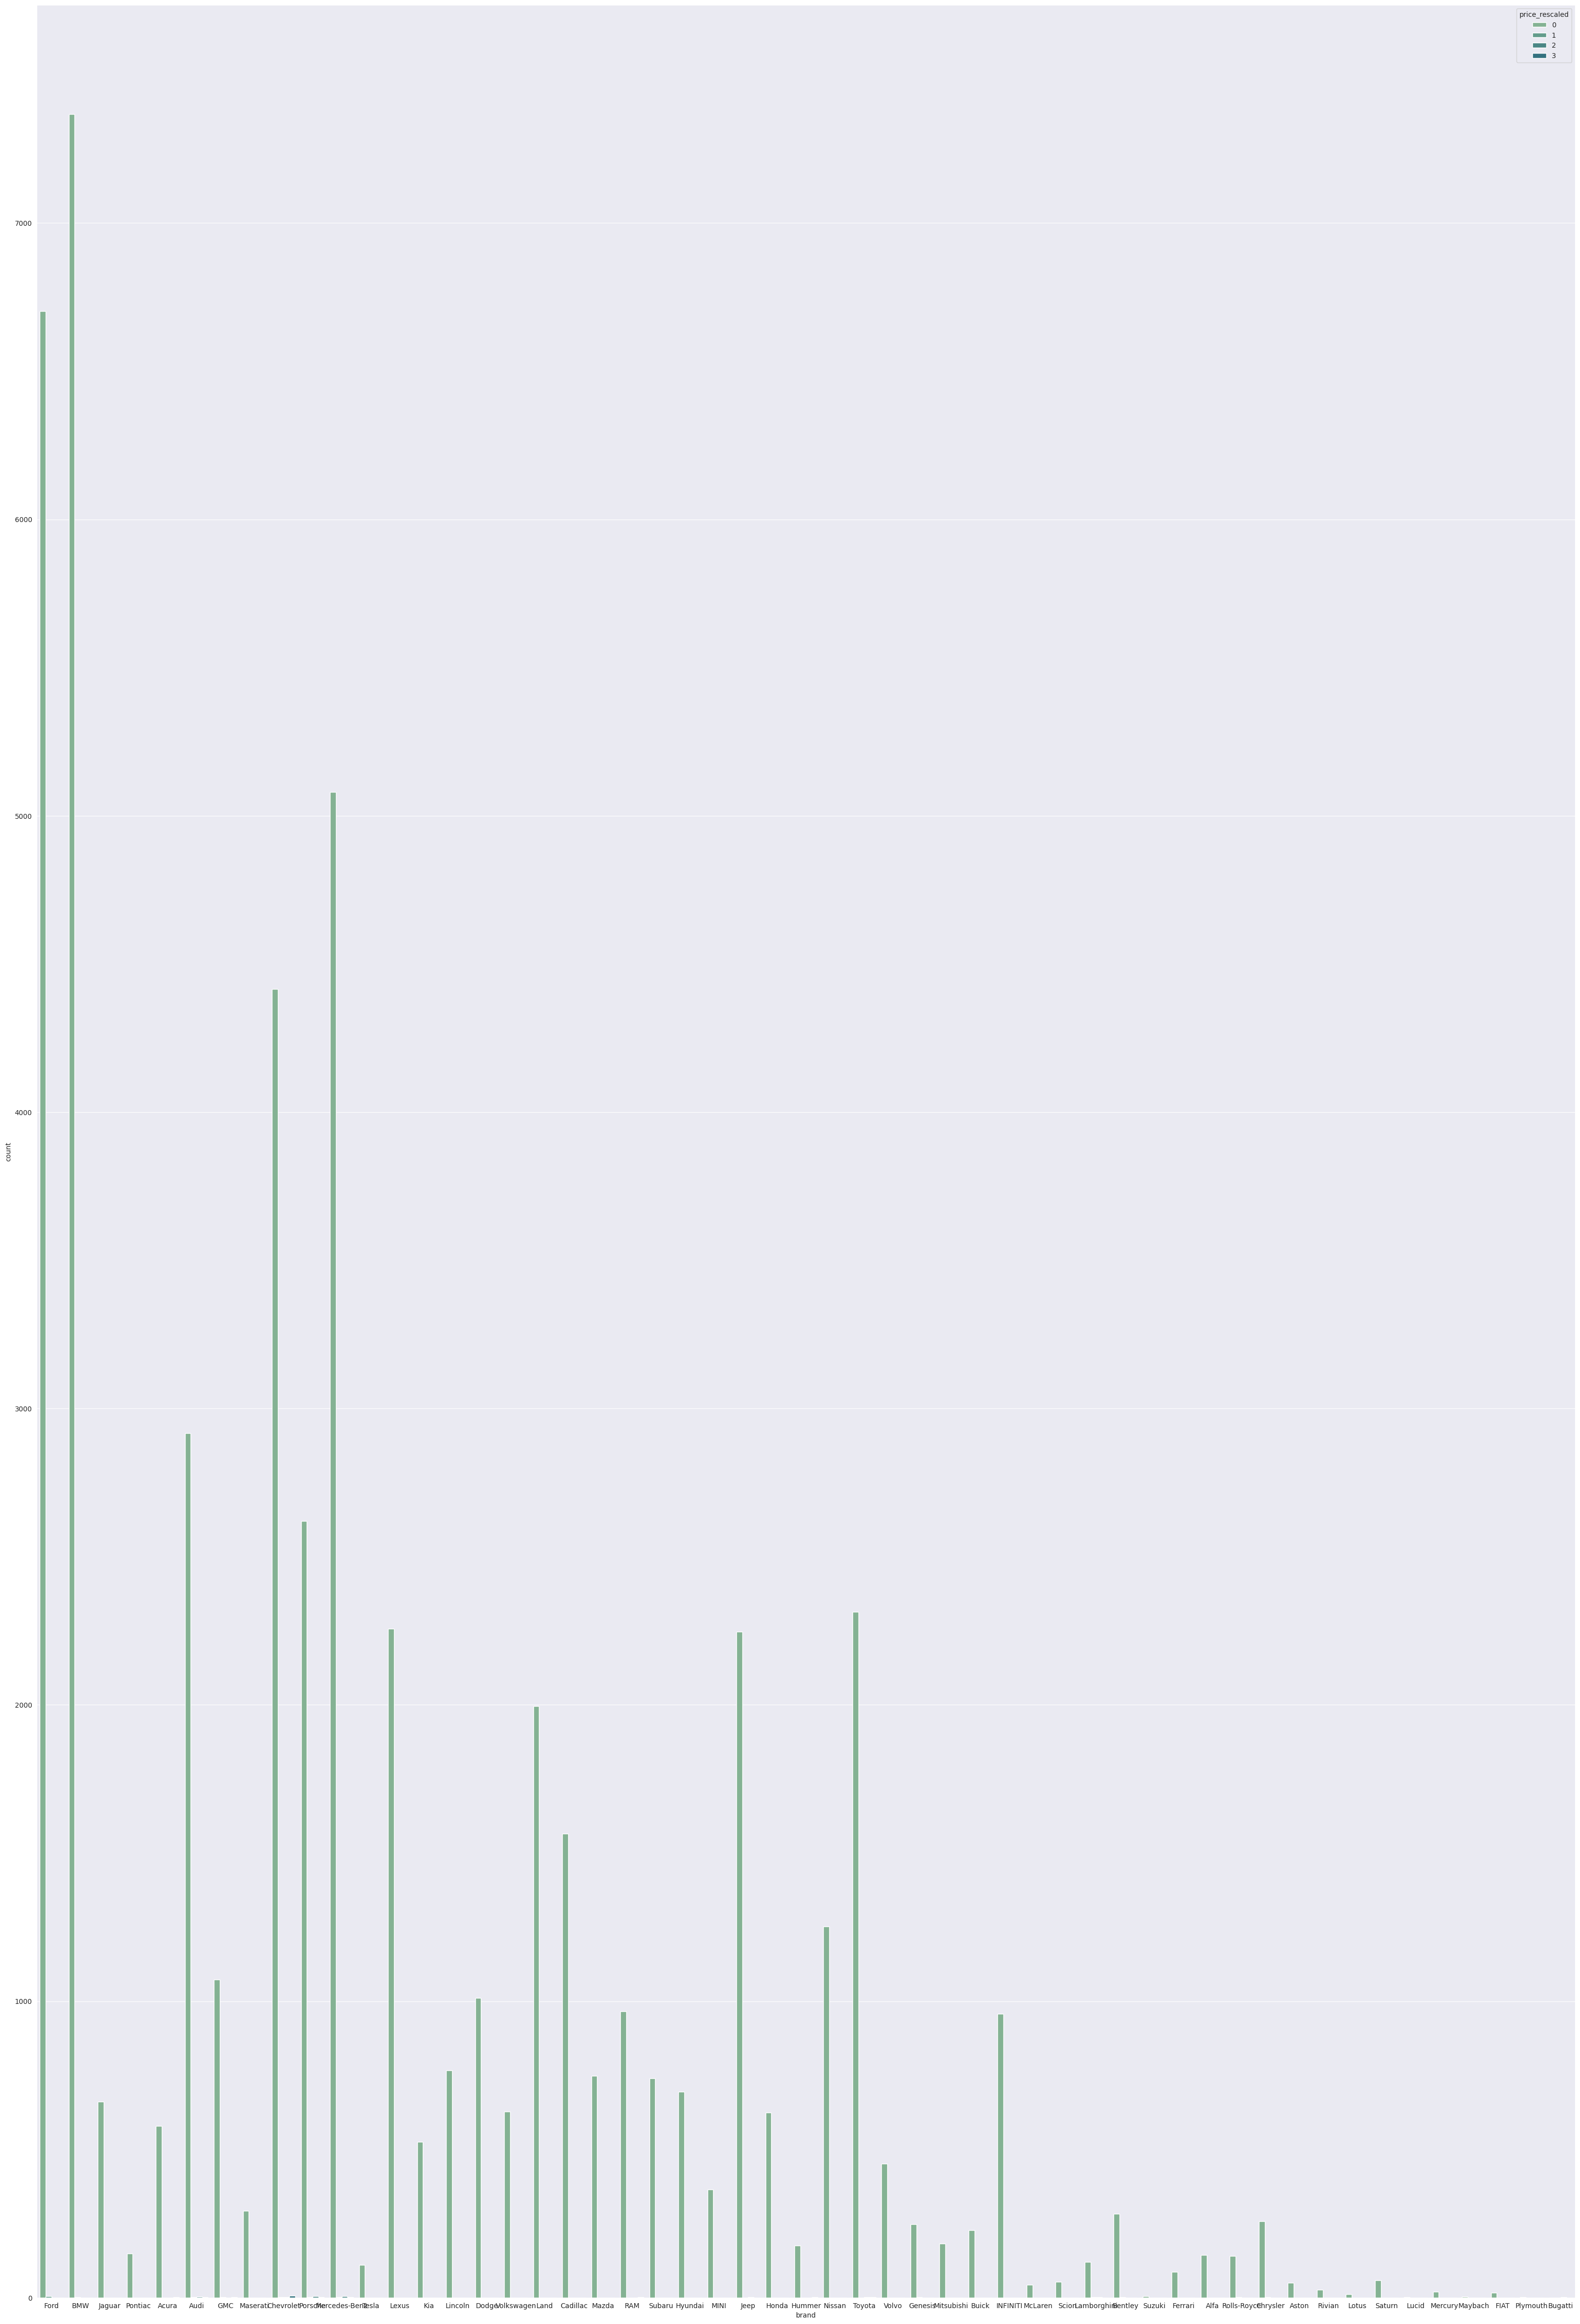

In [33]:
plt.figure(figsize = (40,60))
sns.countplot(x = Df['brand'], hue ="price_rescaled", data=Df) 
plt.show()

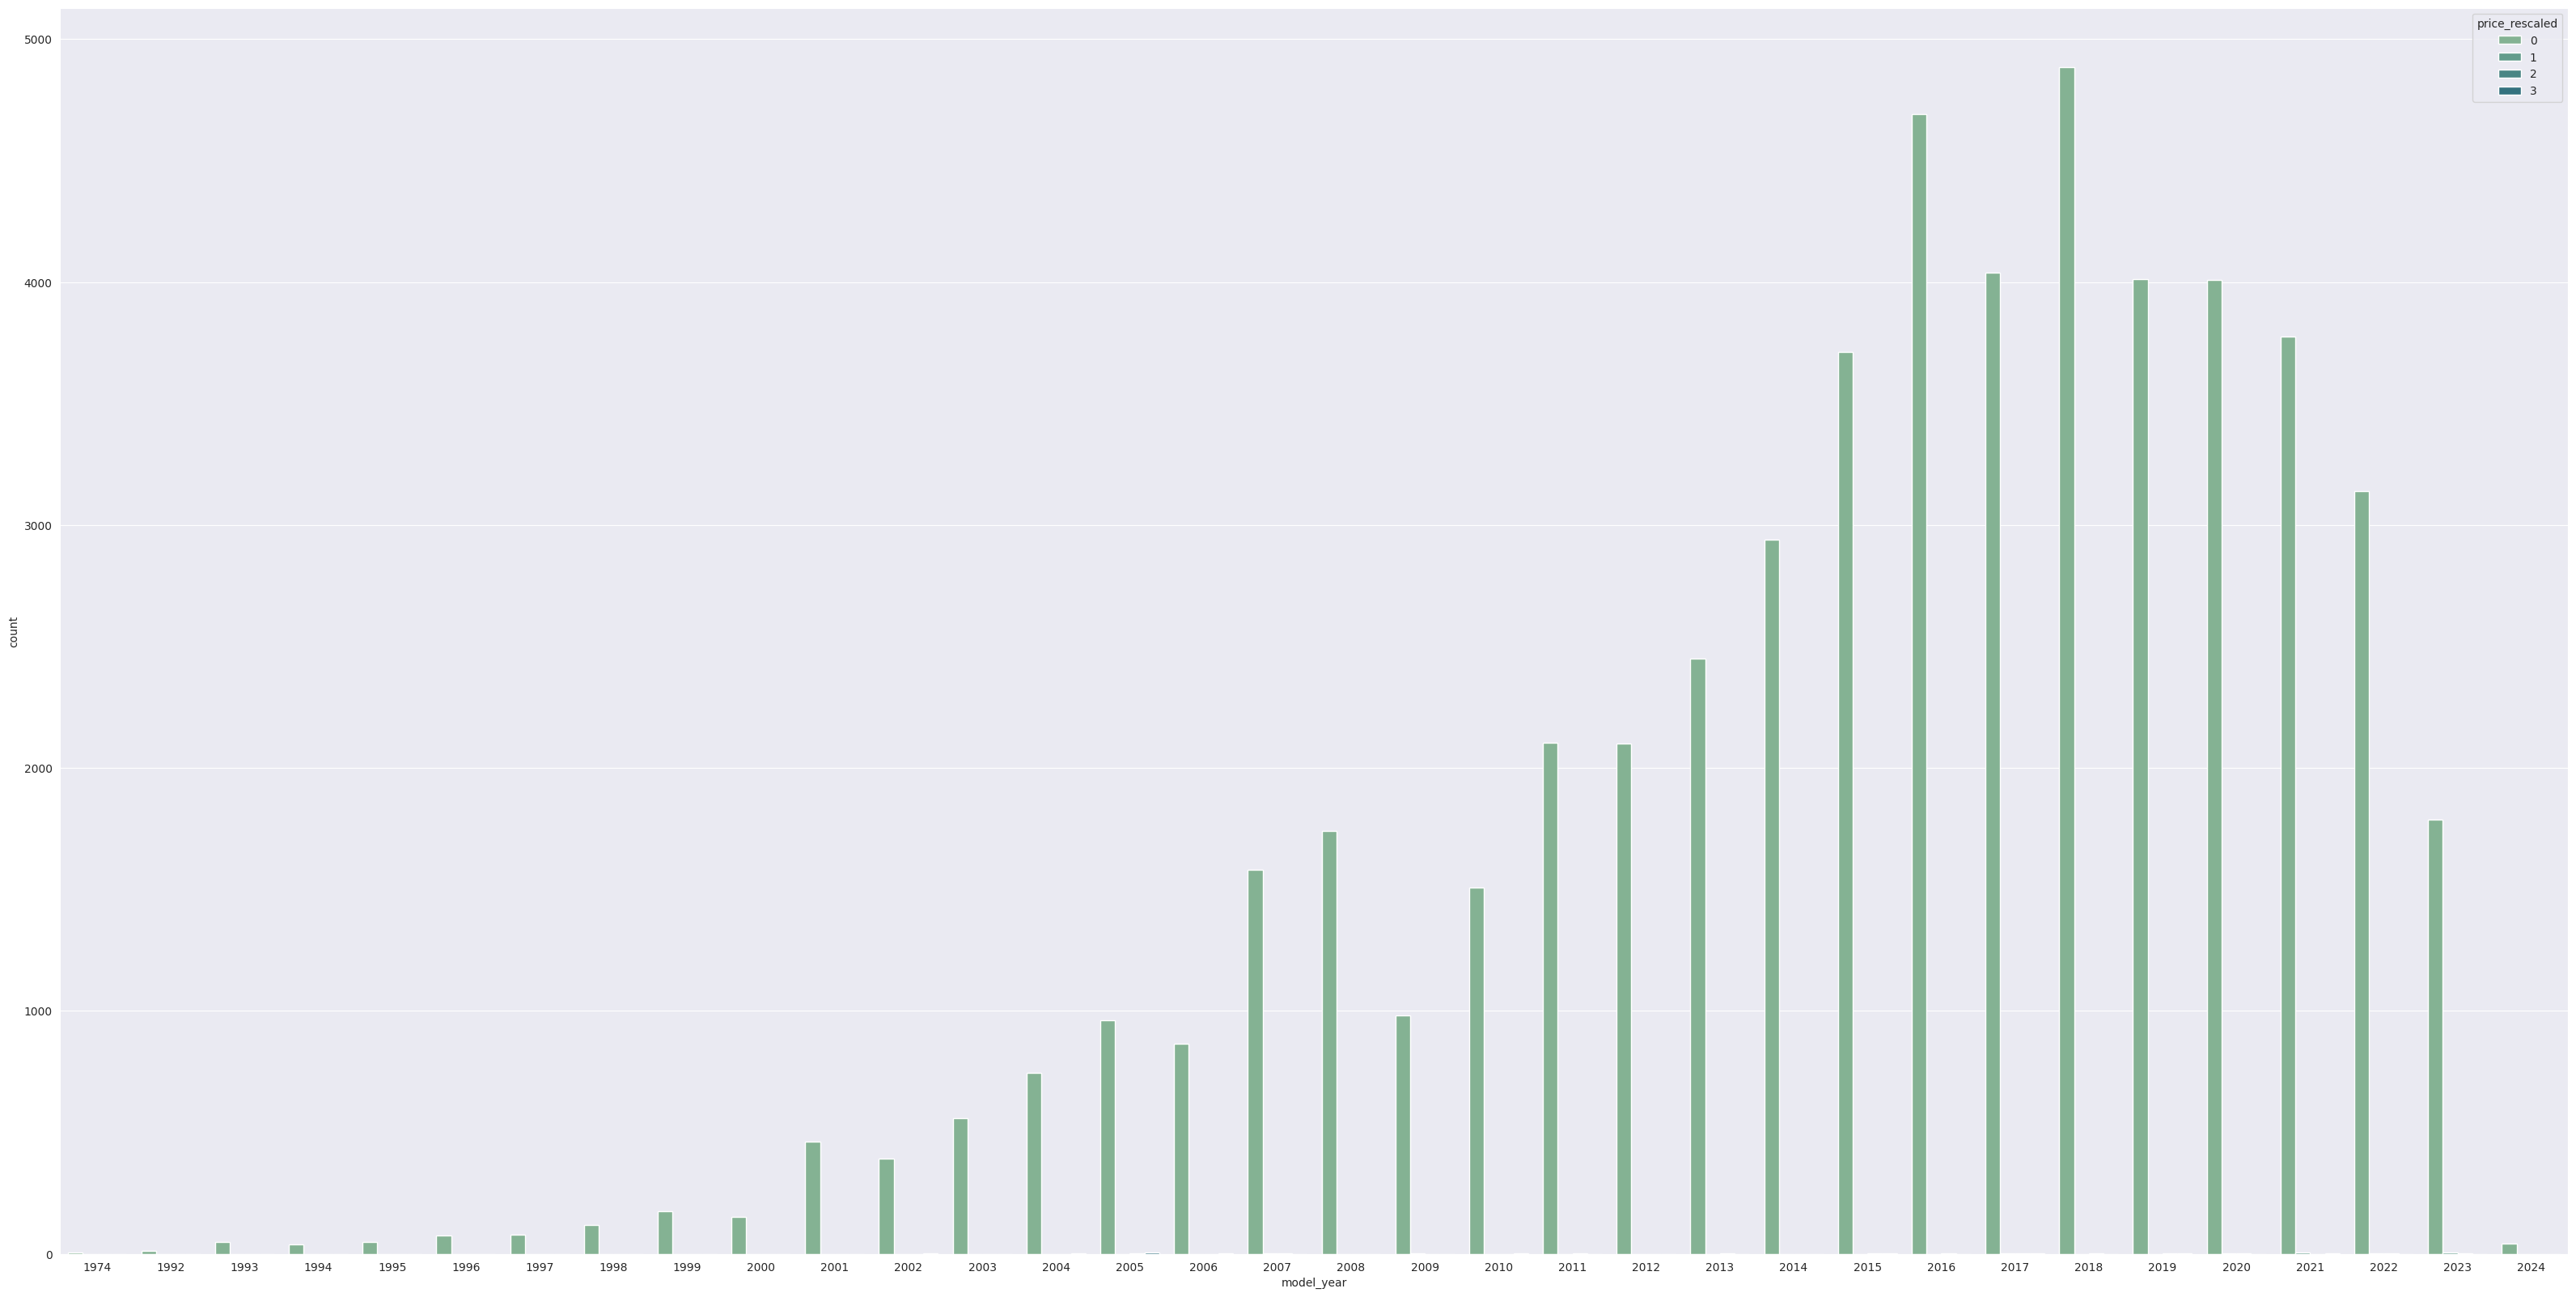

In [34]:
plt.figure(figsize = (40,20))
sns.countplot(x = Df['model_year'], hue ="price_rescaled", data=Df) 
plt.show()

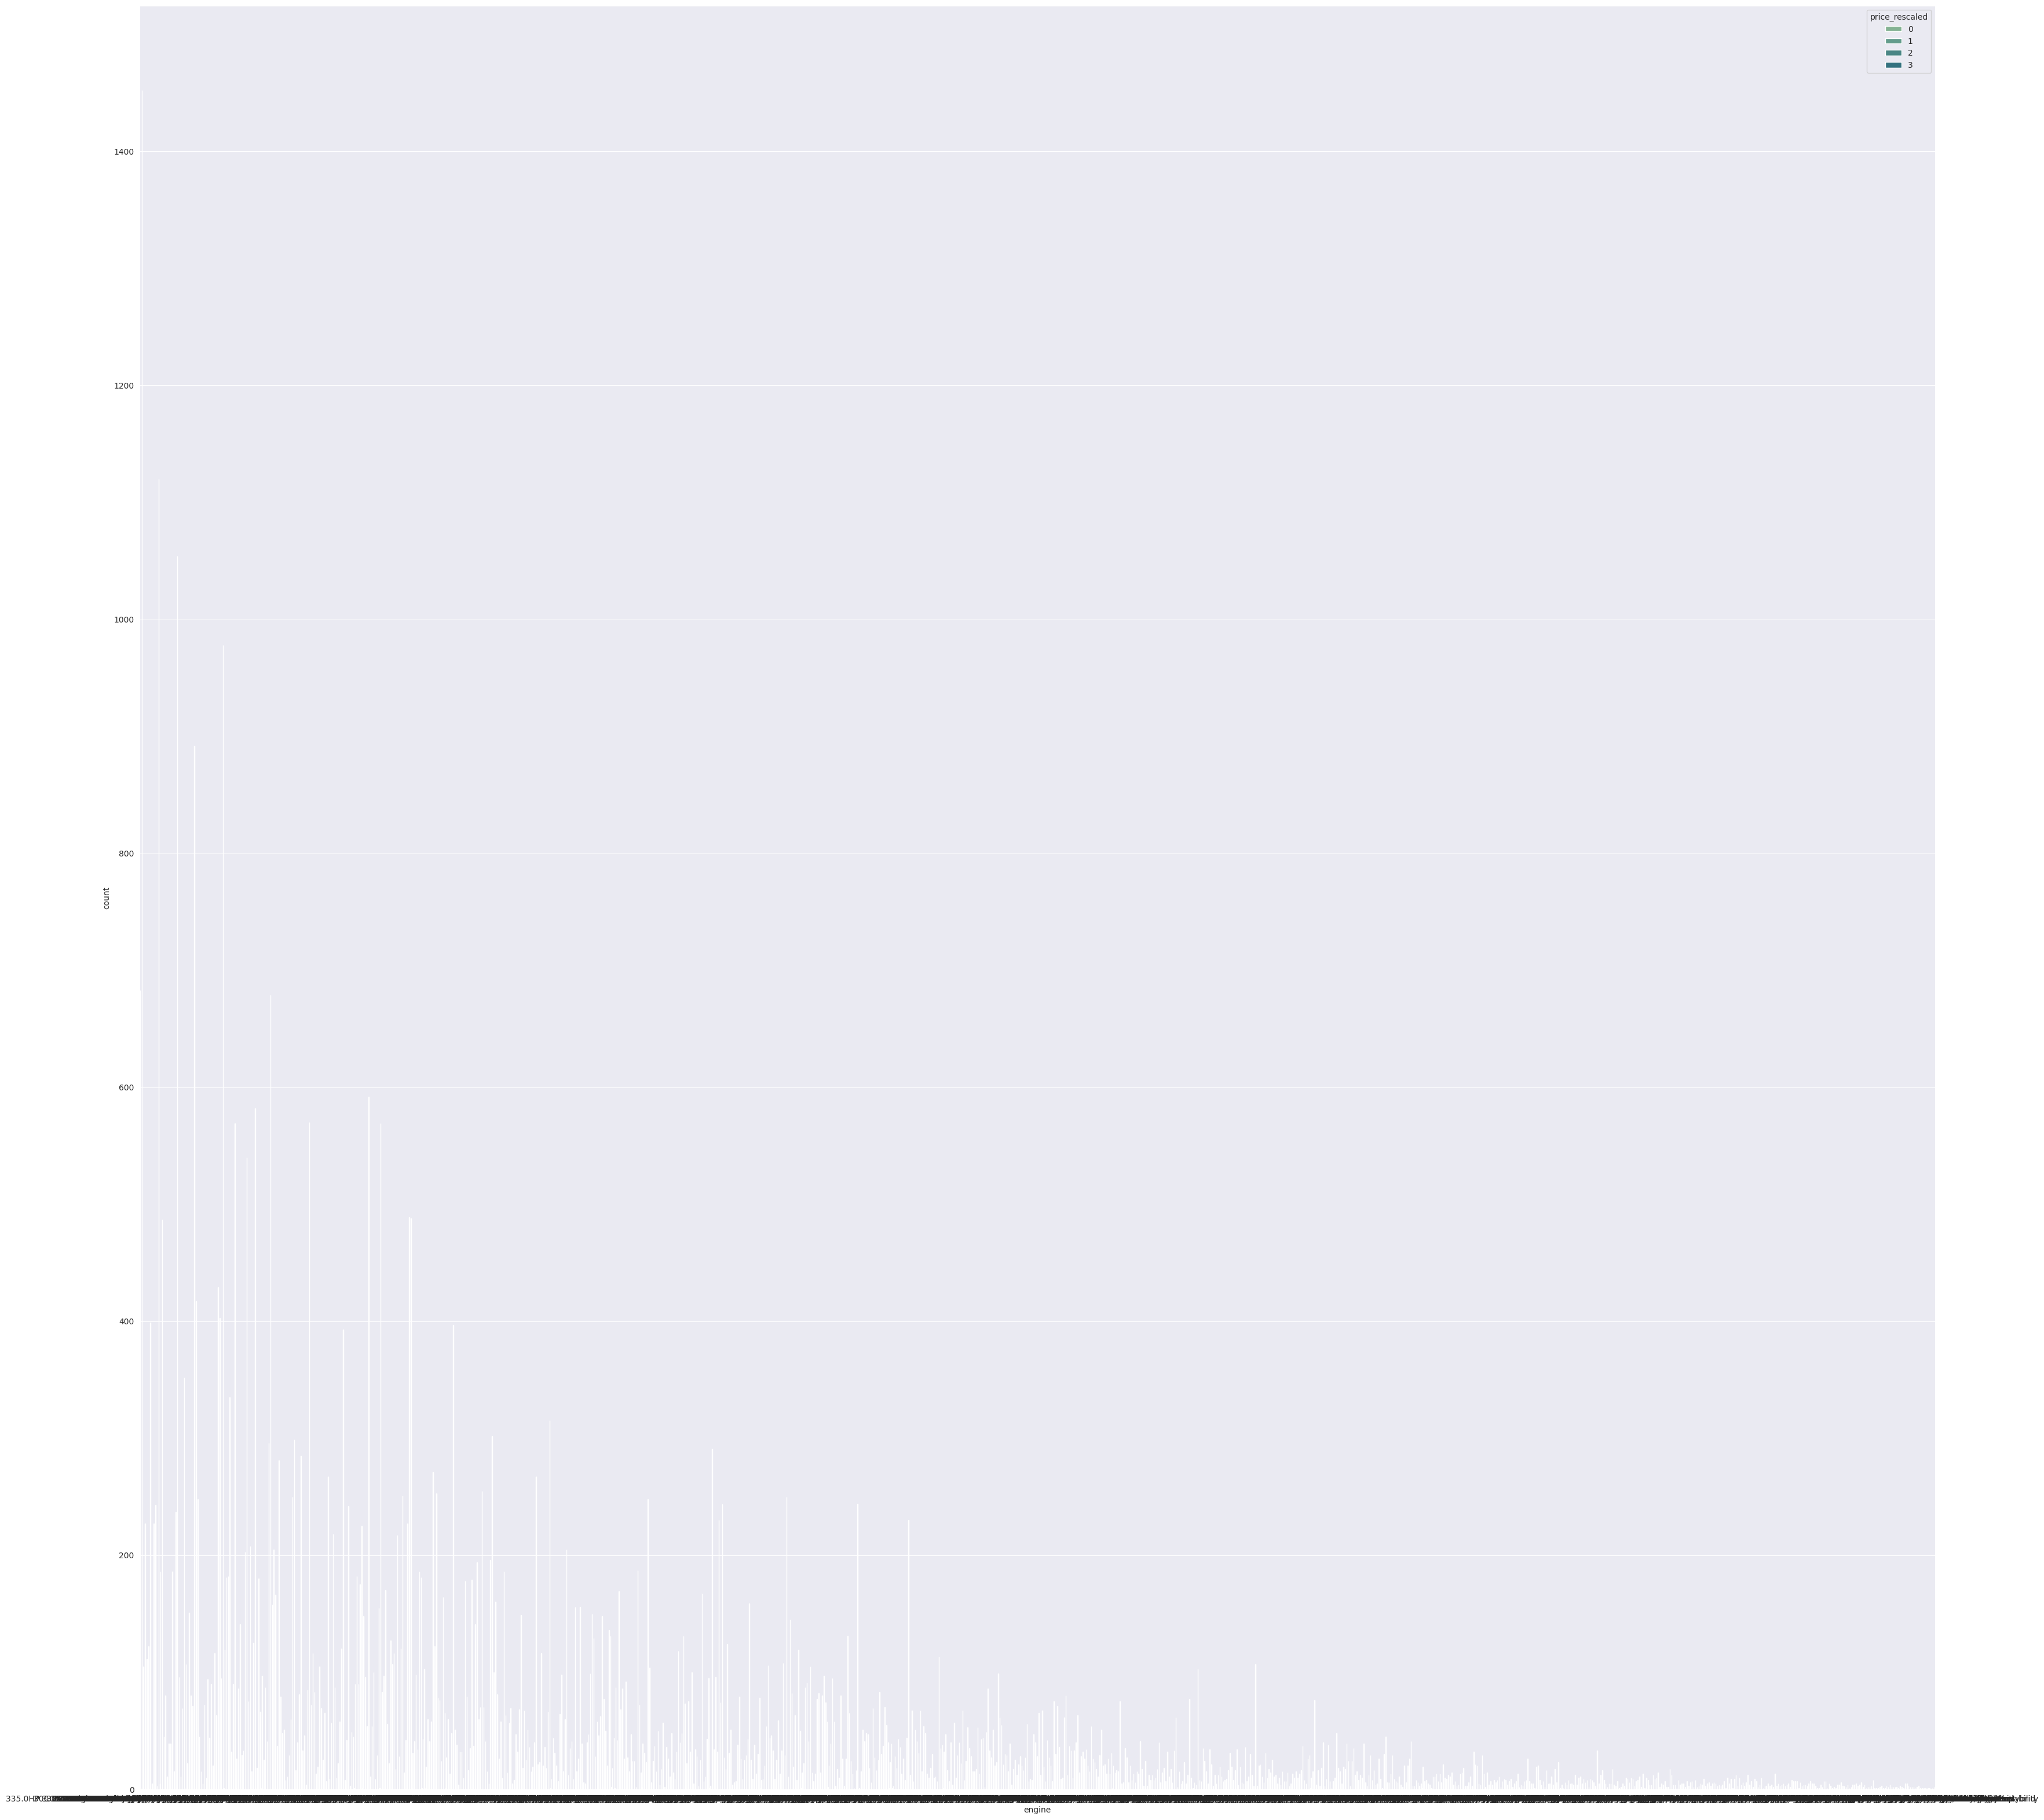

In [35]:
plt.figure(figsize = (40,40))
sns.countplot(x = Df['engine'], hue ="price_rescaled", data=Df) 
plt.show()

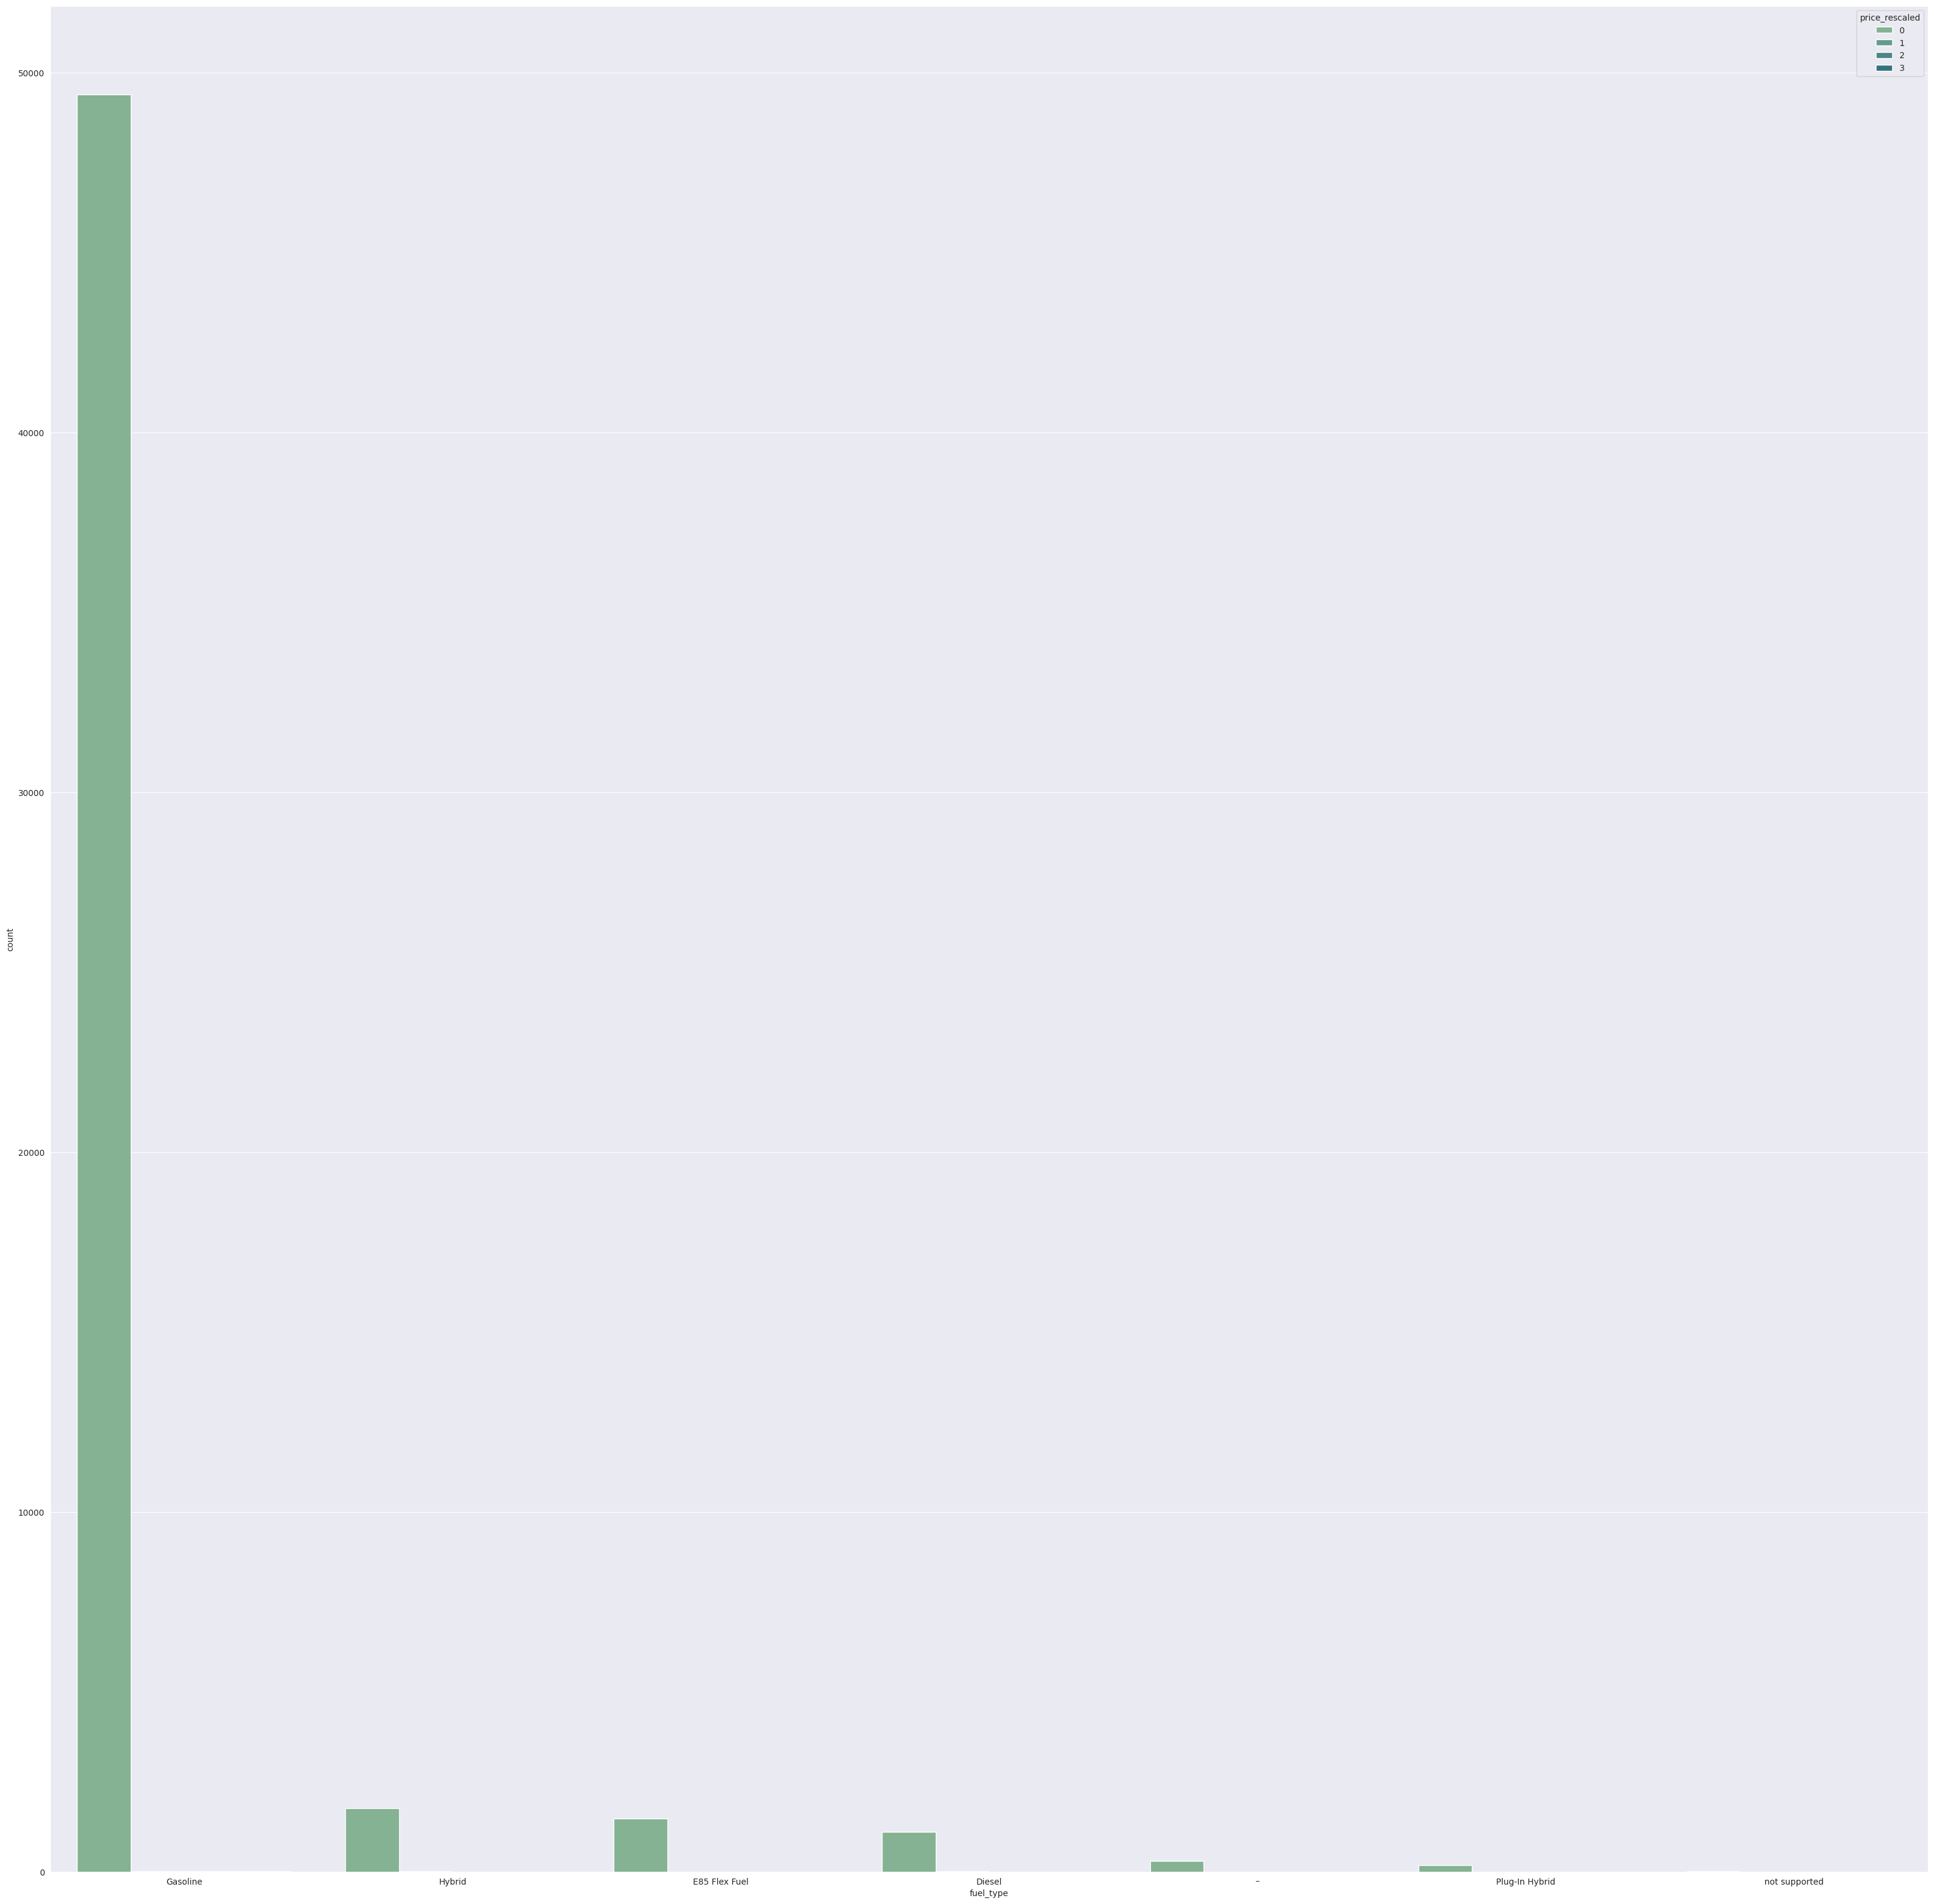

In [36]:
plt.figure(figsize = (40,40))
sns.countplot(x = Df['fuel_type'], hue ="price_rescaled", data=Df) 
plt.show()

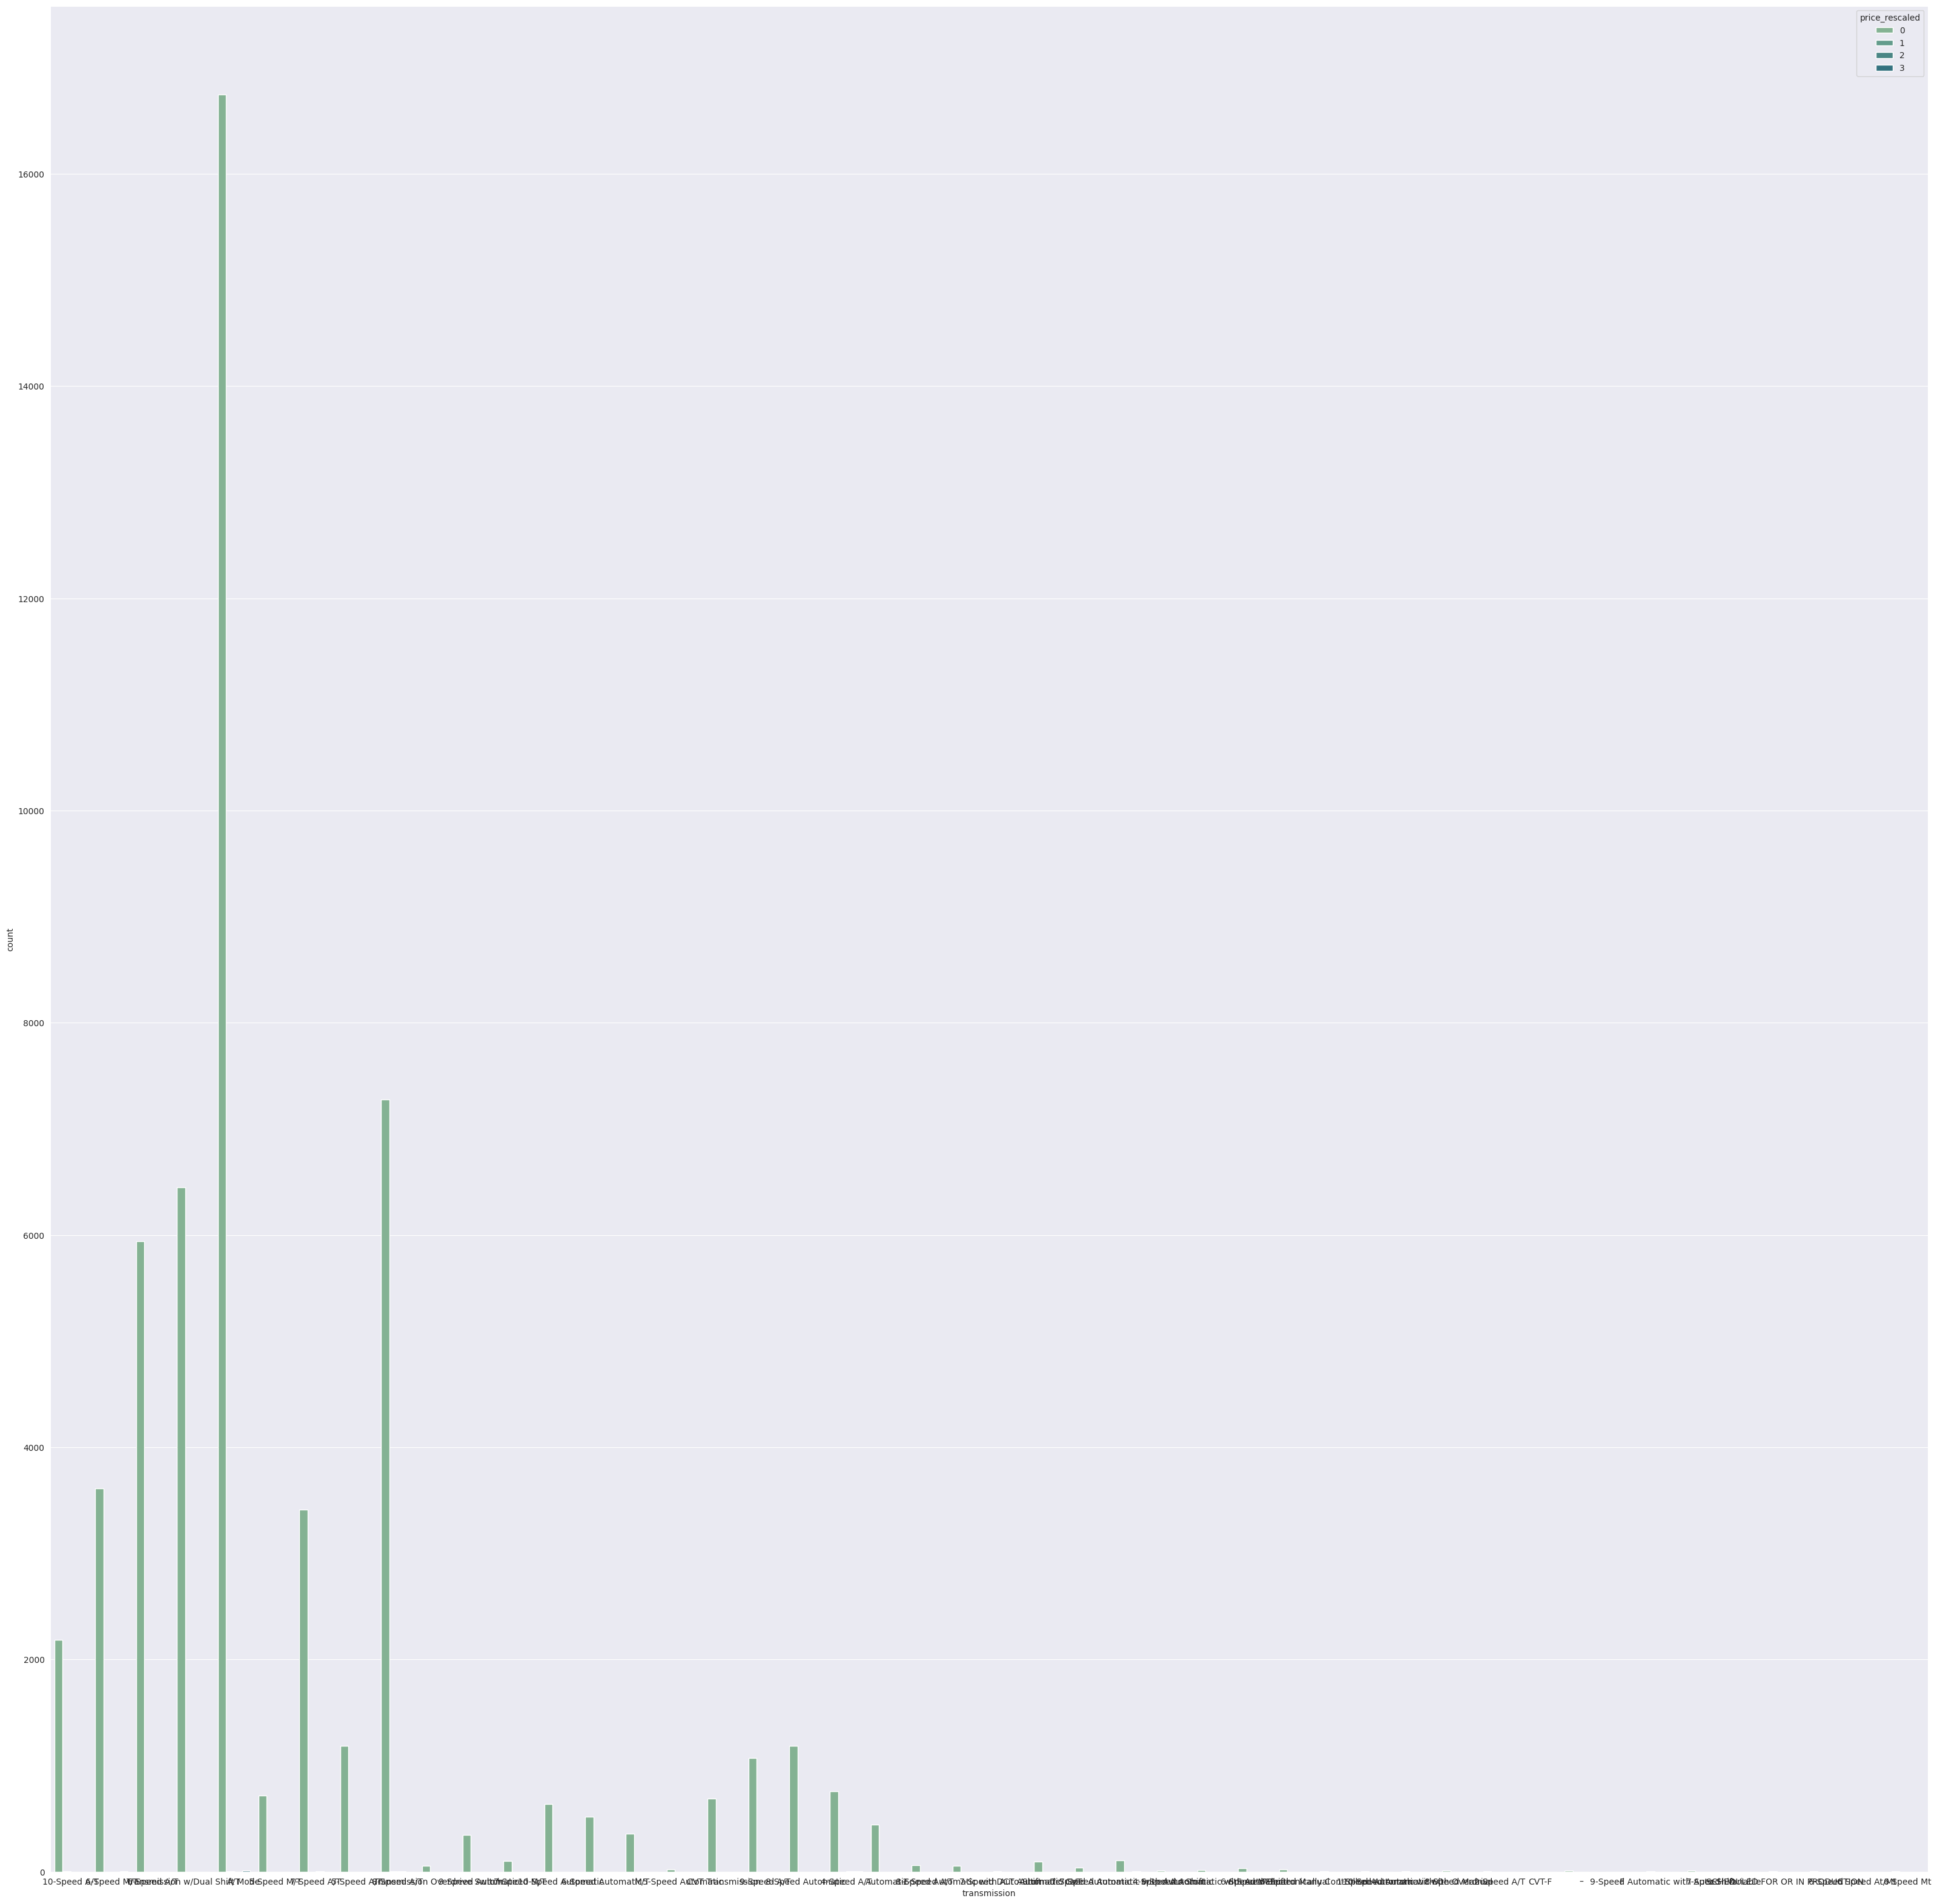

In [37]:
plt.figure(figsize = (40,40))
sns.countplot(x = Df['transmission'], hue ="price_rescaled", data=Df) 
plt.show()

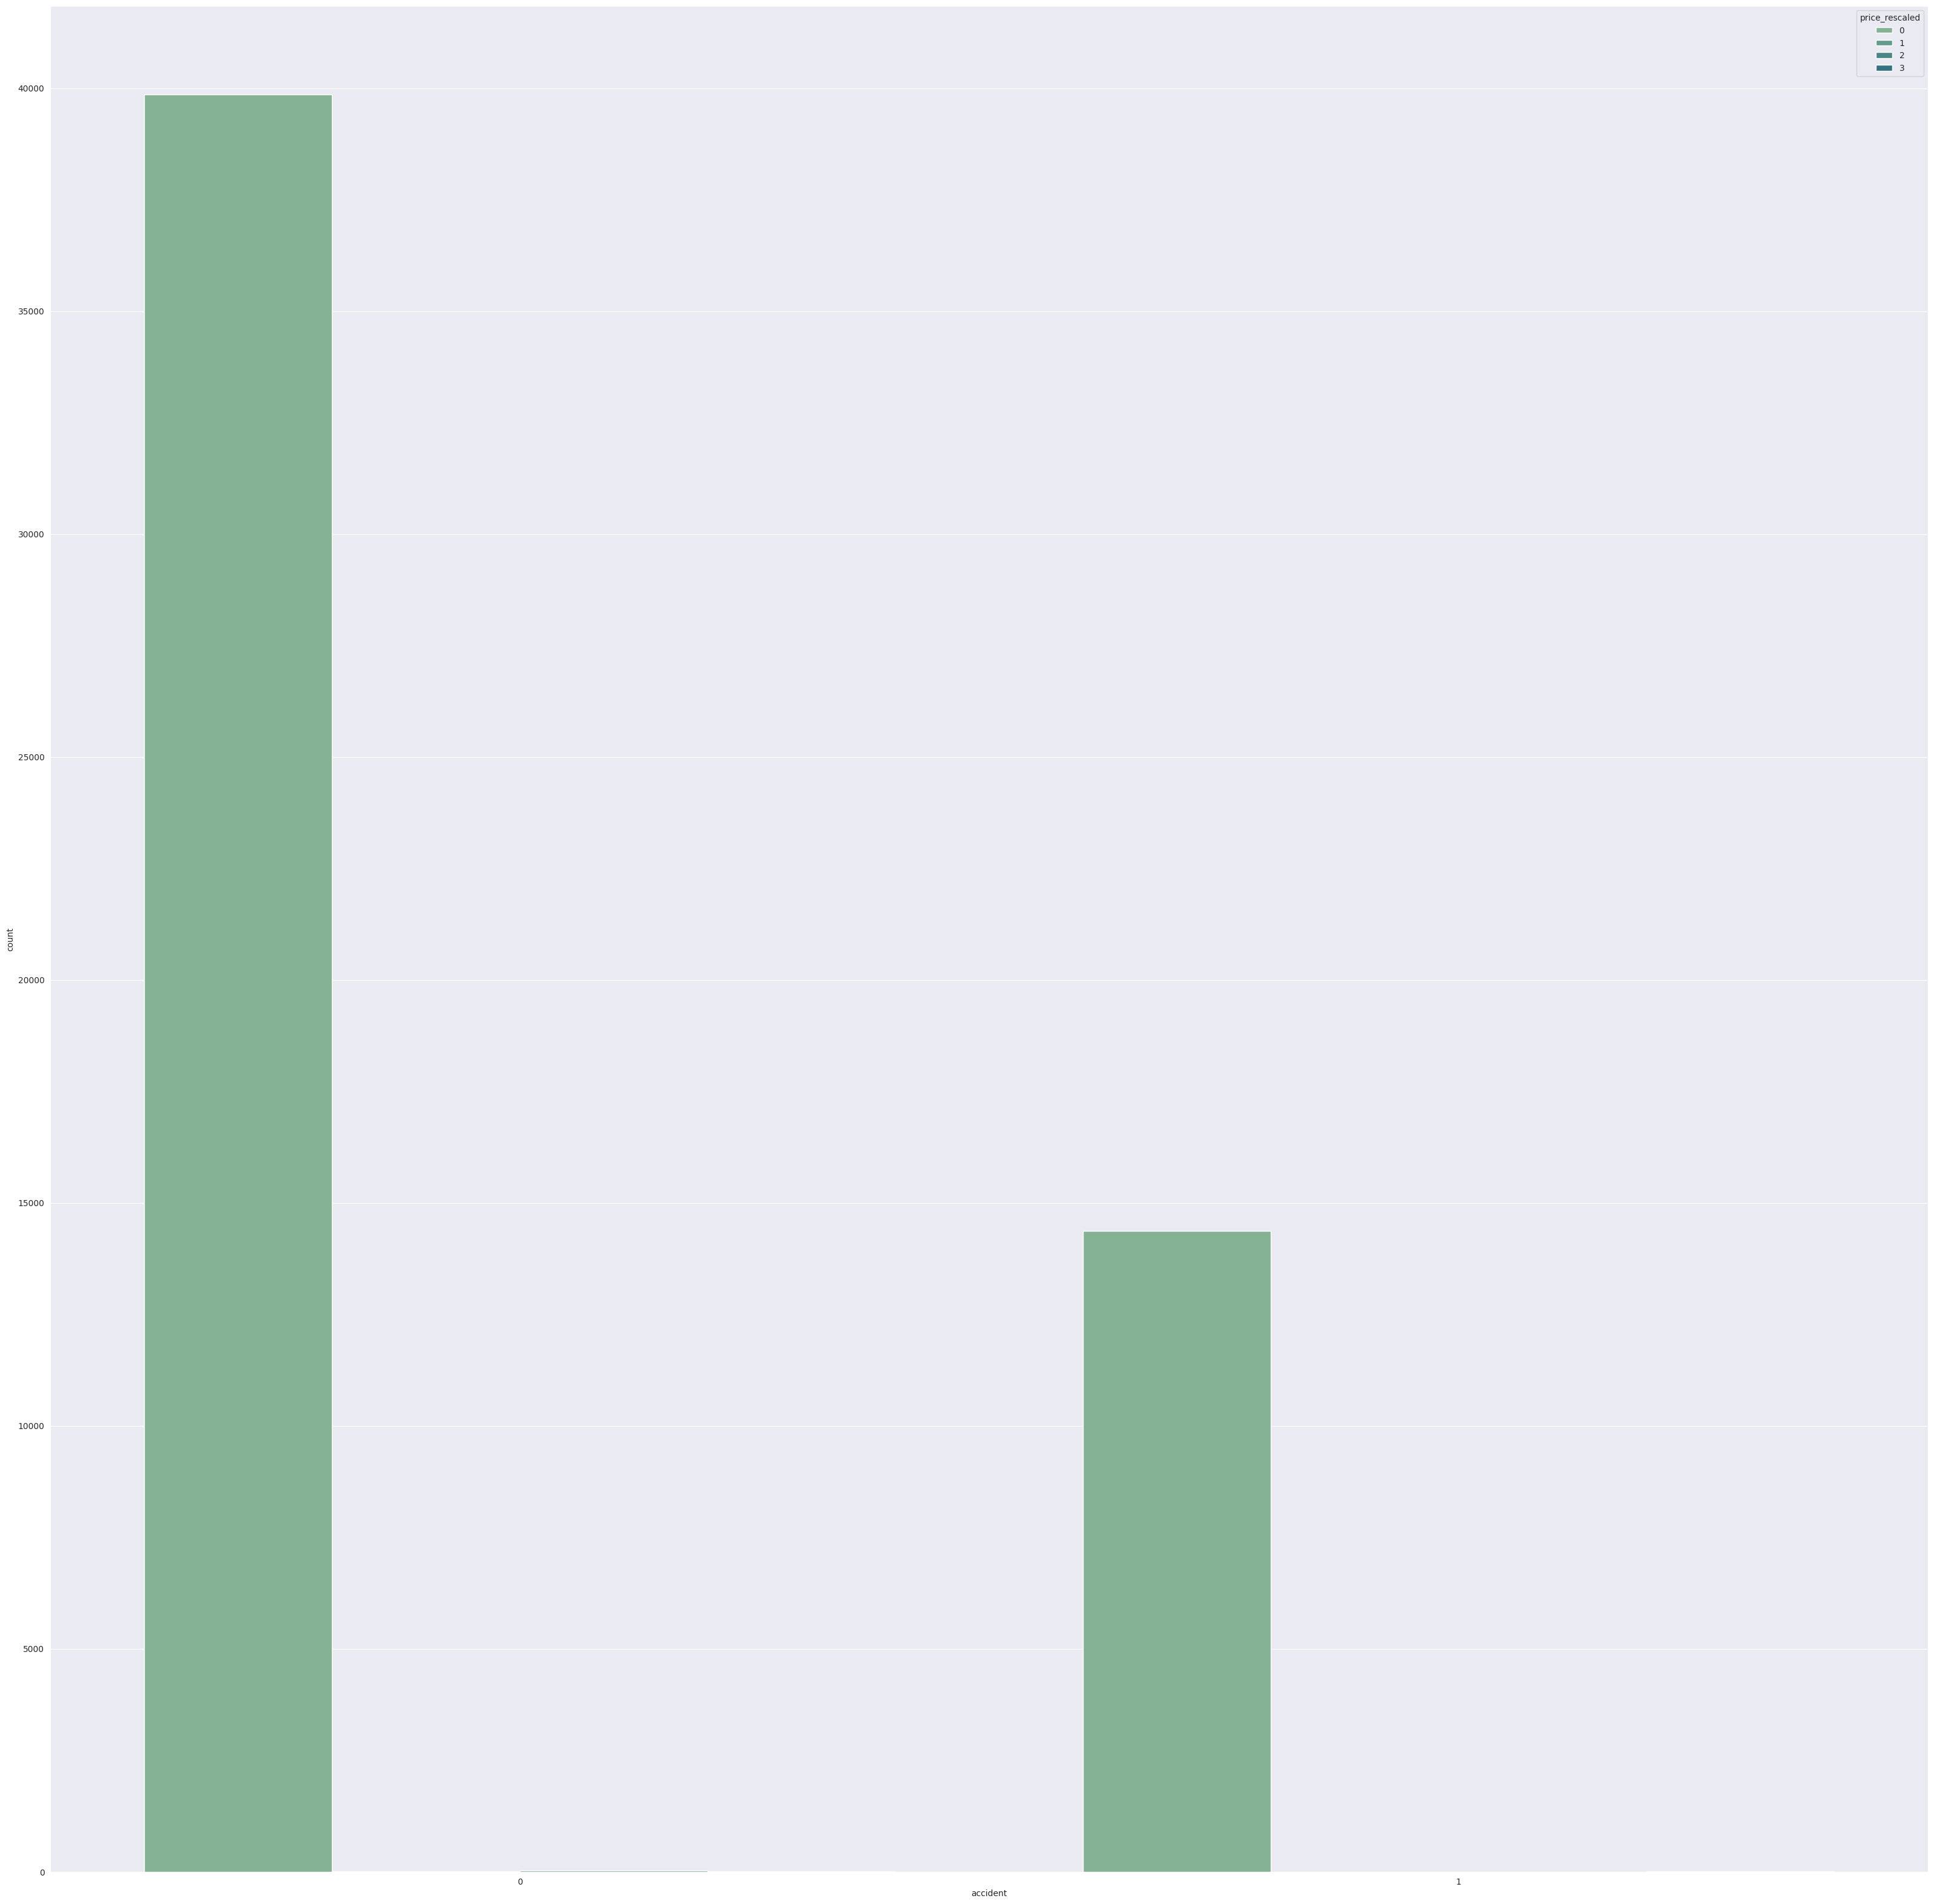

In [38]:
plt.figure(figsize = (40,40))
sns.countplot(x = Df['accident'], hue ="price_rescaled", data=Df) 
plt.show()

In [43]:
brand_counts = Df['brand'].value_counts()
print(brand_counts)

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Merc

In [44]:
model_counts = Df['model'].value_counts()
print(model_counts)

model
F-150 XLT                    780
M3 Base                      682
X5 xDrive35i                 615
F-150 Lariat                 496
Mustang GT Premium           466
                            ... 
Q5 S line Premium              1
RX 350 F SPORT Appearance      1
Q4 e-tron 50 Premium Plus      1
ID.4 Pro S                     1
Land Cruiser                   1
Name: count, Length: 1827, dtype: int64


In [45]:
milage_counts = Df['milage'].value_counts()
print(milage_counts)

milage
60000     361
120000    341
110000    335
170000    320
40000     303
         ... 
4665        1
13735       1
75798       1
96670       1
18650       1
Name: count, Length: 3212, dtype: int64


In [48]:
fuel_counts = Df['fuel_type'].value_counts()
print(fuel_counts)

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64


In [49]:
engine_counts = Df['engine'].value_counts()
print(engine_counts)

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    1452
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             1125
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             1054
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel             979
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              893
                                                         ... 
3.0 Liter SC ULEV                                           1
321.0HP 3.0L V6 Cylinder Engine Gas/Electric Hybrid         1
691.0HP Electric Motor Electric Fuel System                 1
3.6 Liter DOHC                                              1
2.0 Liter TSI                                               1
Name: count, Length: 1061, dtype: int64


In [50]:
transmission_counts = Df['transmission'].value_counts()
print(transmission_counts)

transmission
A/T                                                   16757
8-Speed A/T                                            7287
Transmission w/Dual Shift Mode                         6454
6-Speed A/T                                            5944
6-Speed M/T                                            3618
7-Speed A/T                                            3415
10-Speed A/T                                           2187
8-Speed Automatic                                      1189
5-Speed A/T                                            1185
9-Speed A/T                                            1073
4-Speed A/T                                             764
5-Speed M/T                                             718
CVT Transmission                                        692
10-Speed Automatic                                      642
6-Speed Automatic                                       516
Automatic                                               441
M/T                        

In [51]:
price_counts = Df['price'].value_counts()
print(price_counts)

price
15000     649
12000     495
30000     448
8500      424
17500     420
         ... 
54998       1
49573       1
33531       1
26498       1
199998      1
Name: count, Length: 1481, dtype: int64


In [55]:
Df.describe

<bound method NDFrame.describe of           id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_t

In [58]:
Df.to_csv('/kaggle/working/new.csv', encoding='utf-8', index=False)


In [59]:
df = pd.read_csv('/kaggle/working/new.csv')